In [10]:
import requests
import pandas as pd
import os
import mlflow
from sklearn.metrics import classification_report
import numpy as np

current_path = os.path.dirname(os.getcwd())

file_path = current_path+"/data/01_raw/dataset_kobe_prod.parquet"
data = pd.read_parquet(file_path)


data_filtered = data.dropna()

X_test = data_filtered[['lat','lon','minutes_remaining','period','playoffs','shot_distance']]
Y_test = data_filtered[['shot_made_flag']]


response = requests.post('http://127.0.0.1:5001/invocations', json= {'inputs': X_test.values.tolist() }  )


predict = response.json()


y_pred = predict['predictions']


performance_teste = classification_report(Y_test, y_pred, output_dict=True)

print(performance_teste)




{'0.0': {'precision': 0.6706099815157116, 'recall': 0.9994490358126722, 'f1-score': 0.8026548672566372, 'support': 3630.0}, '1.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1782.0}, 'accuracy': 0.6703621581670363, 'macro avg': {'precision': 0.3353049907578558, 'recall': 0.4997245179063361, 'f1-score': 0.4013274336283186, 'support': 5412.0}, 'weighted avg': {'precision': 0.44979937784590407, 'recall': 0.6703621581670363, 'f1-score': 0.538366069501403, 'support': 5412.0}}


In [11]:
performance_teste

{'0.0': {'precision': 0.6706099815157116,
  'recall': 0.9994490358126722,
  'f1-score': 0.8026548672566372,
  'support': 3630.0},
 '1.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1782.0},
 'accuracy': 0.6703621581670363,
 'macro avg': {'precision': 0.3353049907578558,
  'recall': 0.4997245179063361,
  'f1-score': 0.4013274336283186,
  'support': 5412.0},
 'weighted avg': {'precision': 0.44979937784590407,
  'recall': 0.6703621581670363,
  'f1-score': 0.538366069501403,
  'support': 5412.0}}

c:\Users\belch\anaconda3\envs\kedro_py311\Lib\site-packages\mlflow\store\artifact\utils\models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])


             Feature  Importance  Absolute Importance
0                lat   -0.846998             0.846998
1                lon   -0.248672             0.248672
5      shot_distance   -0.051740             0.051740
3             period   -0.047133             0.047133
4           playoffs    0.016535             0.016535
2  minutes_remaining    0.000894             0.000894


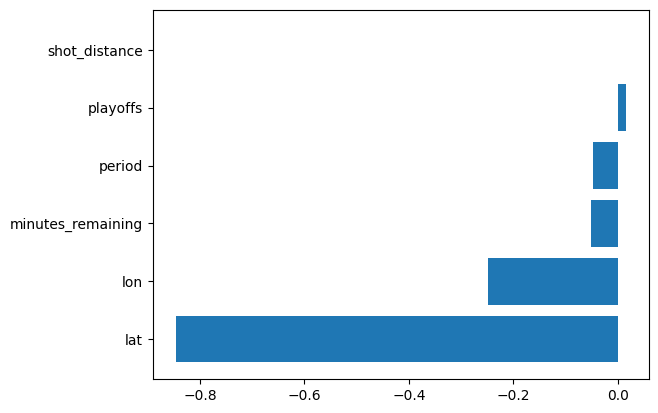

In [17]:
import matplotlib.pyplot as plt

current_path = os.path.dirname(os.getcwd())

file_path = current_path+"/mlruns"

mlflow.set_tracking_uri(f"file:///{file_path}") 

model_uri = "models:/kobe_lr_model_prod/latest"  

   
model = mlflow.sklearn.load_model(model_uri)

feature_names = ['lat','lon','minutes_remaining','period','playoffs','shot_distance']
coefficients = model.coef_[0]  
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": coefficients
})
feature_importance["Absolute Importance"] = np.abs(feature_importance["Importance"])
feature_importance = feature_importance.sort_values(by="Absolute Importance", ascending=False)

# Display feature importance
print(feature_importance)

plt.barh(y=feature_names, width=feature_importance['Importance'].values)
plt.show()